## Hand landmark visualization
This notebook shows an example how to visualize hand landmarks we generated via [Mediapipe](https://google.github.io/mediapipe/).

In [1]:
import cv2
import json
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
sample_video = 'f17a6060-6ced-4bd1-9886-8578cfbb864f.mp4'
sample_id = sample_video[:-4]

In [3]:
with open('slovo_landmarks.json') as file:
    landmarks = json.load(file)

For each hand in each frame we have 21 keypoints:

In [4]:
from IPython.display import Image
Image(url= "https://developers.google.com/static/mediapipe/images/solutions/hand-landmarks.png")

*Source: [MediaPipe Solutions Guide](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker)*

In [5]:
vidcap = cv2.VideoCapture(sample_video)
width  = int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [6]:
# calculate absolute landmark values
landmark_abs = landmarks[sample_id]
for frame in landmark_abs:
    for hand in frame:
        points = frame[hand]
        for point in points:
            point['x'] *= width
            point['y'] *= height

## Visualize frames

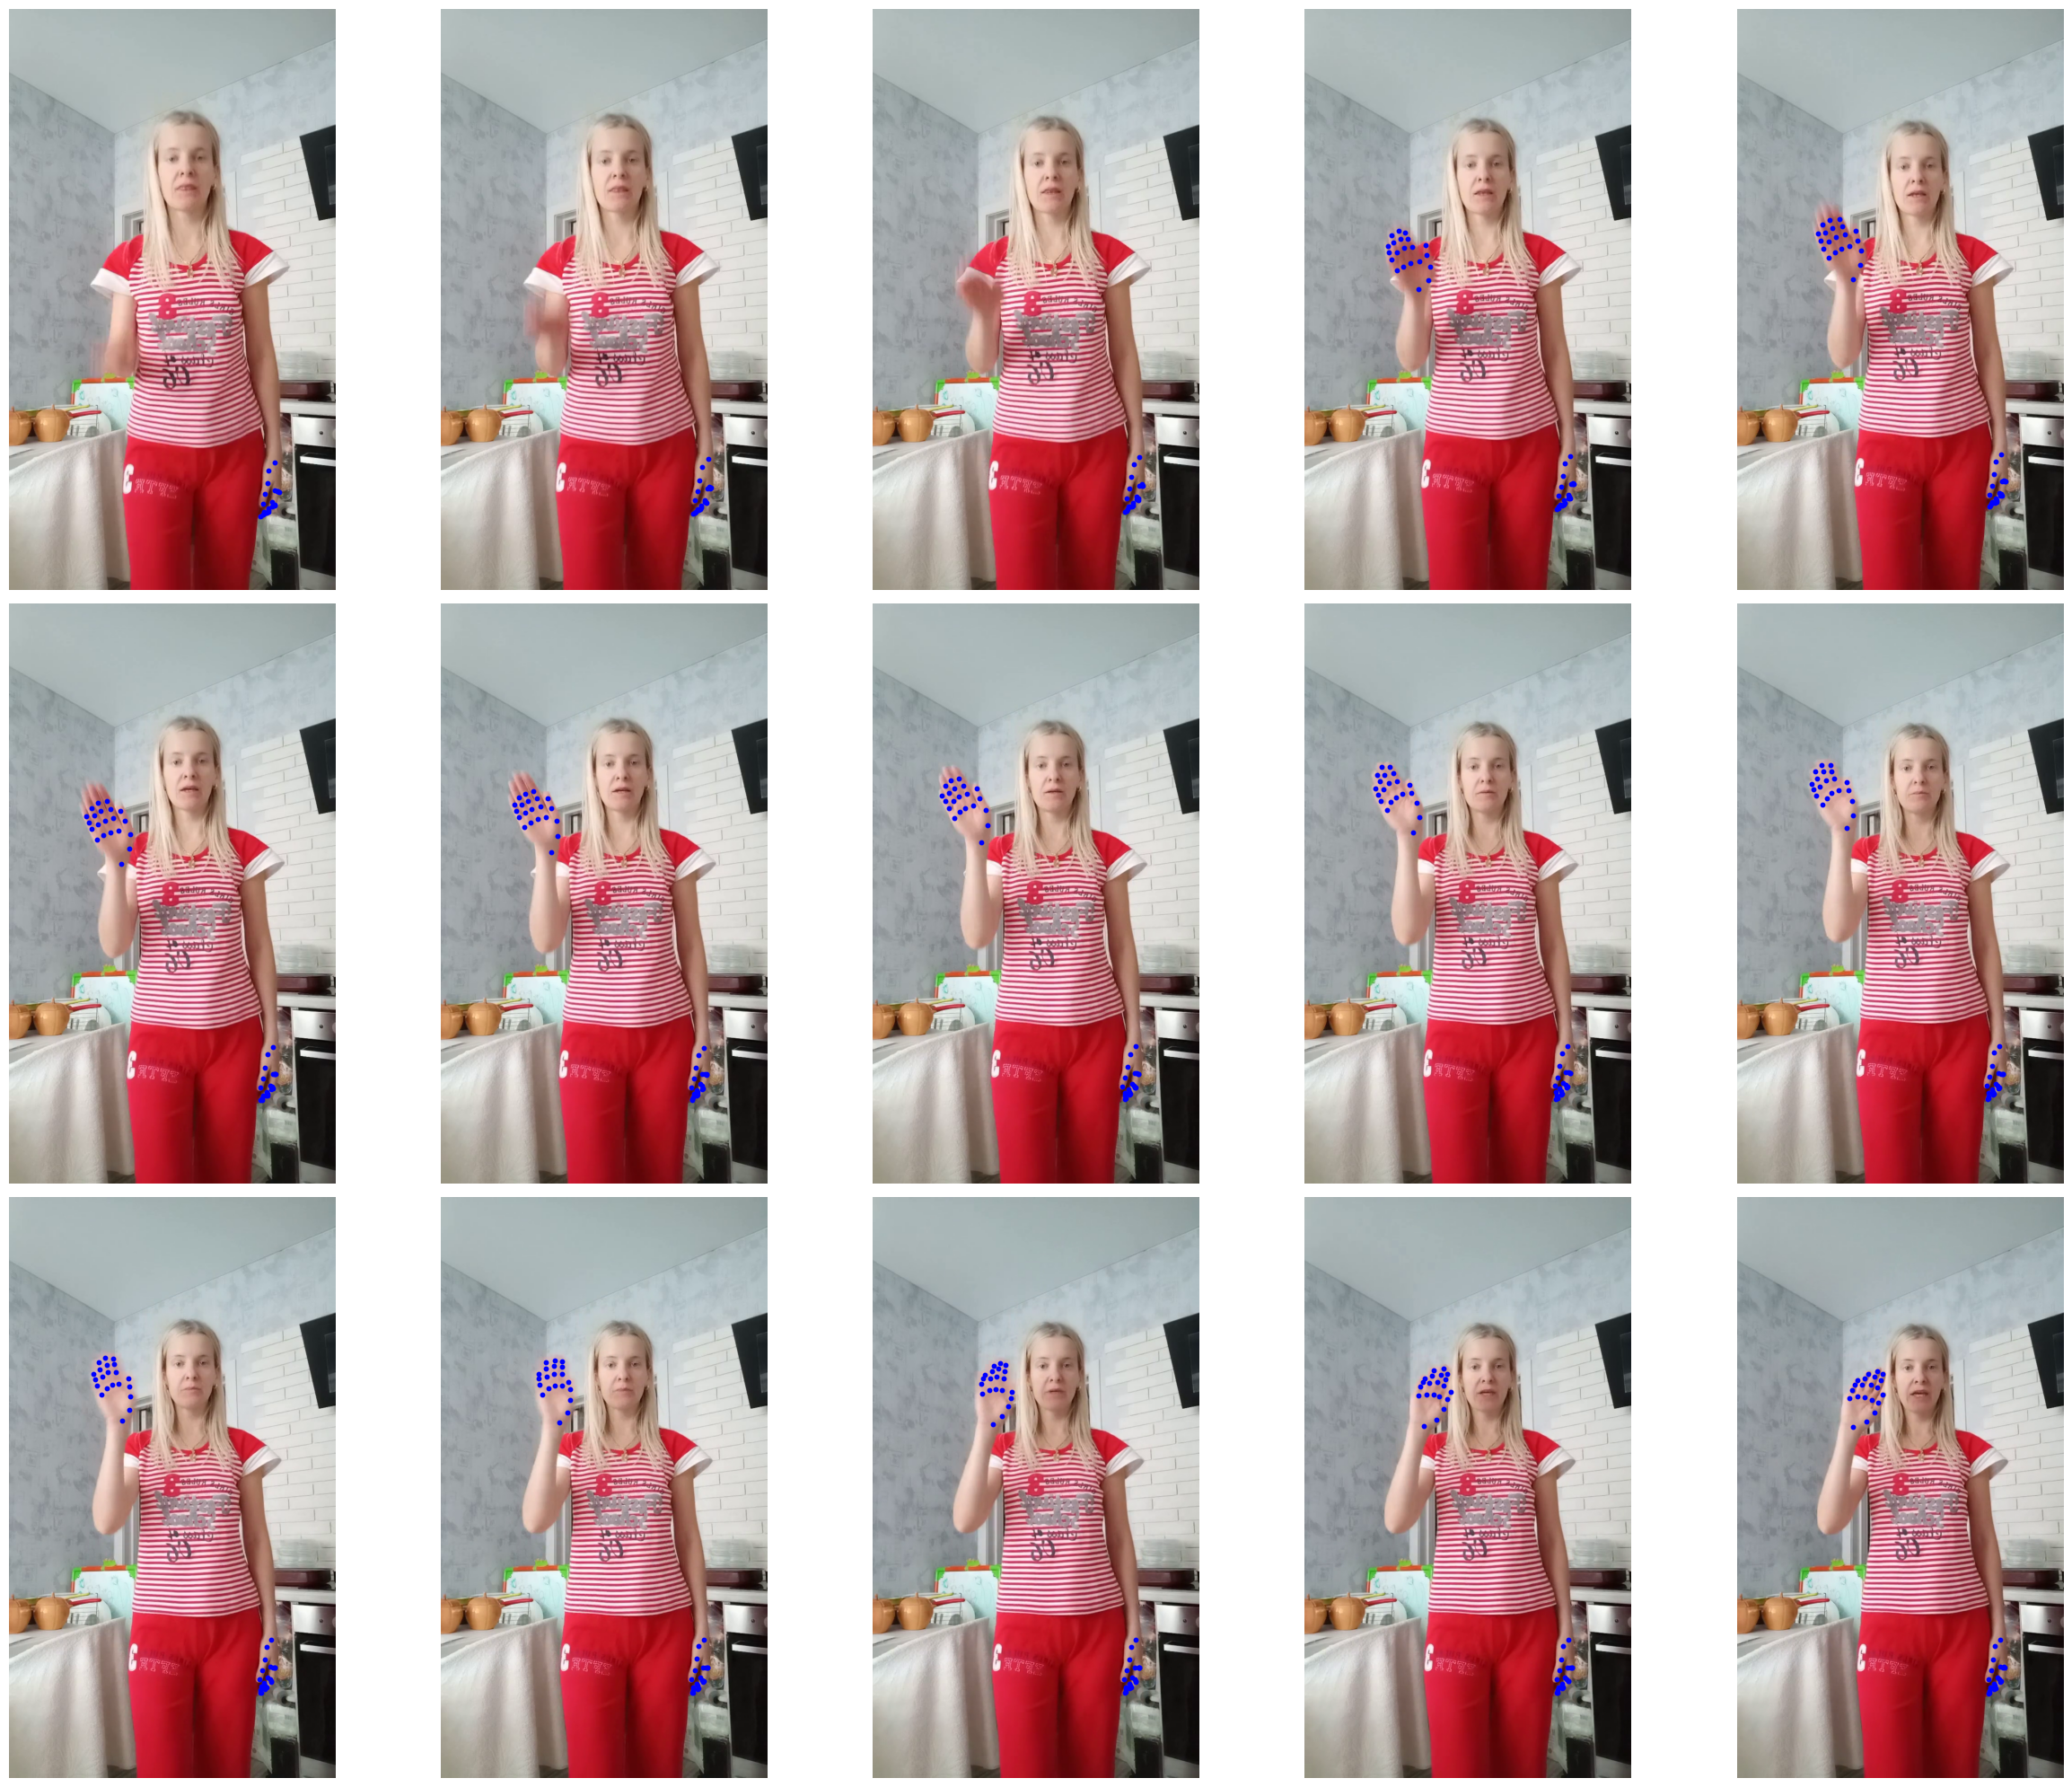

In [7]:
NUM_FRAMES = 15

fig = plt.figure(figsize=(25, 20))
vidcap = cv2.VideoCapture(sample_video)
for i, landmark in enumerate(landmark_abs[:NUM_FRAMES]):
    success, frame = vidcap.read()
    plt.subplot(3, 5, i + 1)
    plt.imshow(frame[:, :, ::-1])
    plt.axis('off')
    for hand in landmark:
        points = landmark[hand]
        for point in points:
            plt.scatter(point['x'], point['y'], c='b', s=10)
plt.tight_layout()
plt.show()

## Draw landmarks on video

In [8]:
vidcap = cv2.VideoCapture(sample_video)
writer = cv2.VideoWriter("video_landmarks.mkv", cv2.VideoWriter_fourcc(*"h264"), 30.0, (width, height))
for i, landmark in enumerate(landmark_abs):
    success, frame = vidcap.read()
    for hand in landmark:
        points = landmark[hand]
        for point in points:
            out = cv2.circle(frame, [int(point['x']), int(point['y'])], 1, [0,255,0], 3)
        writer.write(frame)

In [10]:
from IPython.display import display, HTML

video_path = "video_landmarks.mkv"
video_tag = f'<video controls autoplay src="{video_path}" width="640" height="1024"/>'
display(HTML(video_tag))